# Solving nonlinear problems using a kernel SVM

## Kernel methods for linearly inseparable data

We will create a dataset that emulates 'XOR' gate using the `logical_xor` function from the Numpy library:

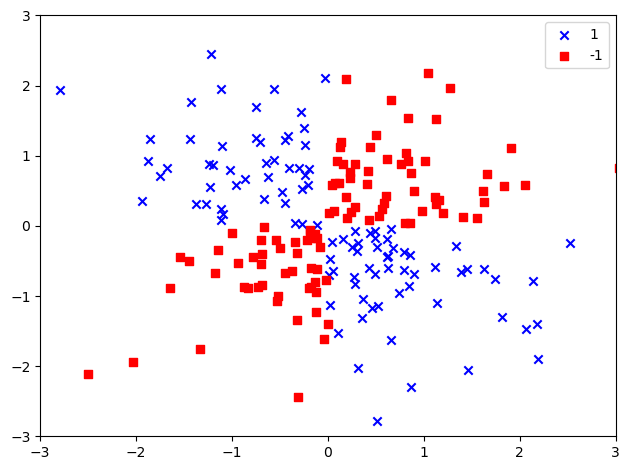

In [6]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b', marker = 'x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0], 
            X_xor[y_xor == -1, 1],
            c = 'r',
            marker = 's',
            label = -1)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The graph that we've created clearly cannot be separated by a single line in two-dimensional space. One way to address this is by kernelizing the data. Kernelization involves transforming a two-dimensional dataset into a new three-dimensional feature space, where the classes become separable. The following projection can be used to achieve that:

$$\phi(x_1,x_2) = (z_1, z_2, z_3) = (x_1, x_2, x^2_1 + x_2^2)$$

## Using the kernel trick to find separating hyperplanes in a high-dimensional space

Mapping input data points to a higher-dimensional space can be computationally costly, if not impossible. Kernel functions, however, allow us to calculate the dot product of new vectors in the feature space without actually needing to compute those new vectors using the mapping function. One of such kernels i the *radial basis function* kernel (Gaussian kernel).

$$\kappa\left(\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)}\right)=\exp \left(-\frac{\left\|\boldsymbol{x}^{(i)}-\boldsymbol{x}^{(j)}\right\|^{2}}{2 \sigma^{2}}\right)$$

Kernels can be interpreted as a similarity function between pairs of examples. The more similar the examples are to each other, the greater the value of this function. Due to the exponential term in the equation, the output of the Gaussian kernel ranges between 0 and 1.

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

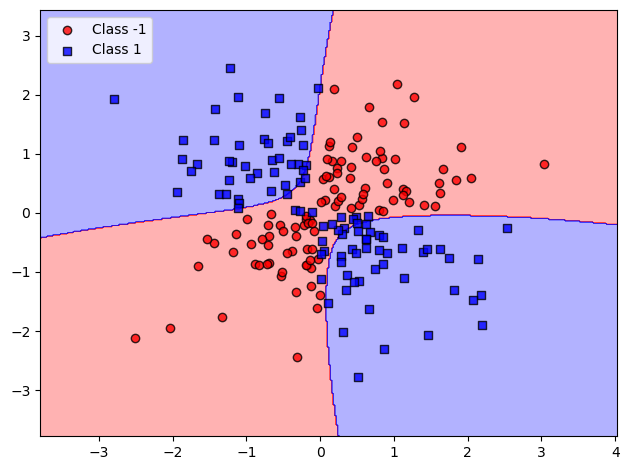

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf',
          random_state = 1, 
          gamma = 0.10, 
          C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()